In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

np.random.seed(44)

In [2]:
# Simulate a Markov matrix in M_n([0, 1])
n = 4
A = np.random.randint(0, 10, (n, n))
A = A / np.sum(A, axis=0)

In [3]:
# Get the Gershgorin discs for each column of the Markov matrix
aii = np.diag(A)
radii = np.sum(A - aii * np.eye(n), axis=0)

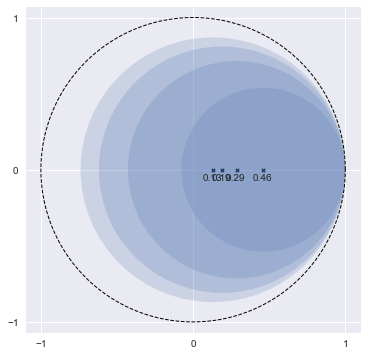

In [4]:
# Plot the Gershgorin discs
with plt.style.context("seaborn"):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot circles
    for a, radius in zip(aii, radii):
        circle = Circle((a, 0), radius, alpha=0.2)
        fig.gca().add_patch(circle)

        ax.scatter(a, 0, c='k', s=10, marker='x')
        ax.annotate(round(a, 2), (a + 0.06, -0.025), va="top", ha="right", fontsize=10)

    # Add a unit circle
    x = np.linspace(0, 2 * np.pi, 200)
    ax.plot(np.cos(x), np.sin(x), "k--", linewidth=1, label="Unit Circle")

    ax.axis('equal')
    ax.set(xticks=[-1, 0, 1], yticks=[-1, 0, 1])
    # plt.legend()
    plt.savefig("../images/markov_gershgorin.svg")
    plt.show()